# Eda Google

In [1]:
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
googleb = 'C:\\Users\\maria\\OneDrive\\Escritorio\\Proyecto final\\Google_Business.parquet'
df = pd.read_parquet(googleb, engine='fastparquet') 

In [3]:
df.head(1)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,MISC.Health & safety,MISC.Health and safety,MISC.Highlights,MISC.Lodging options,MISC.Offerings,MISC.Payments,MISC.Planning,MISC.Popular for,MISC.Recycling,MISC.Service options
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,[Pharmacy],4.9,16,None,...,"[Mask required, Staff required to disinfect su...",[],[],[],[],[],[Quick visit],[],[],"[In-store shopping, Same-day delivery]"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   name                    object 
 1   address                 object 
 2   gmap_id                 object 
 3   description             object 
 4   latitude                float64
 5   longitude               float64
 6   category                object 
 7   avg_rating              float64
 8   num_of_reviews          int64  
 9   price                   object 
 10  hours                   object 
 11  state                   object 
 12  relative_results        object 
 13  url                     object 
 14  MISC.Accessibility      object 
 15  MISC.Activities         object 
 16  MISC.Amenities          object 
 17  MISC.Atmosphere         object 
 18  MISC.Crowd              object 
 19  MISC.Dining options     object 
 20  MISC.From the business  object 
 21  MISC.Getting here       object 

In [4]:
#Suma de nulos
df.isnull().sum()

name                           37
address                     80511
gmap_id                         0
description               2770722
latitude                        0
longitude                       0
category                    17419
avg_rating                      0
num_of_reviews                  0
price                     2749808
hours                     3025011
state                      746455
relative_results           295058
url                             0
MISC.Accessibility         690834
MISC.Activities            690834
MISC.Amenities             690834
MISC.Atmosphere            690834
MISC.Crowd                 690834
MISC.Dining options        690834
MISC.From the business     690834
MISC.Getting here          690834
MISC.Health & safety       690834
MISC.Health and safety     690834
MISC.Highlights            690834
MISC.Lodging options       690834
MISC.Offerings             690834
MISC.Payments              690834
MISC.Planning              690834
MISC.Popular f

#### Vamos a usar los nulos para verificar que columnas nos sirven del dataset 

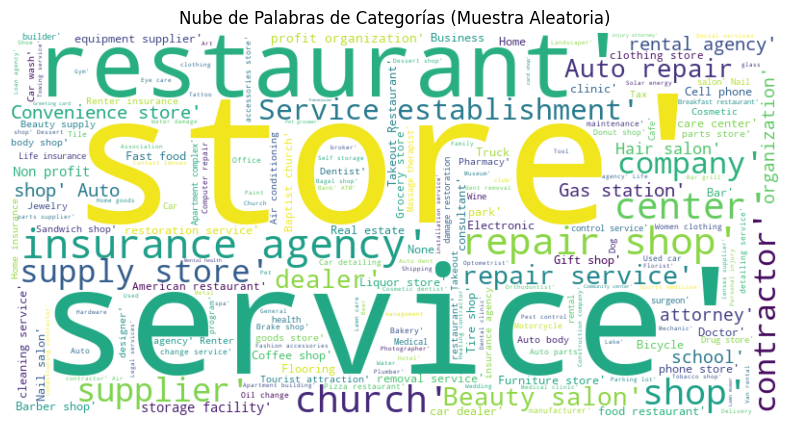

In [5]:
#Nube de palabras
import random

# Obtén una muestra aleatoria de las categorías
sample_size = 1000  # Puedes ajustar este valor según tus necesidades
random_sample = random.sample(df['category'].astype(str).tolist(), sample_size)

# Concatena las categorías de la muestra
sample_categories = " ".join(random_sample)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_categories)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Categorías (Muestra Aleatoria)')
plt.show()


#### De todas las palabras de la muestra aleatoria nos llamo la atencion las que tienen que ver con servicio y gastronomia, elegimos para explorar wine.

In [6]:
# Despues de evaluar los nulos elimino las columnas que no sirven para el analisis del modelo y las que tienen nulos

columns_to_drop = ['price', 'hours', 'state', 'url', 'MISC.Accessibility', 'MISC.Activities', 'MISC.Amenities', 'MISC.Atmosphere', 'MISC.Crowd', 'MISC.Dining options', 'MISC.From the business', 'MISC.Getting here', 'MISC.Health & safety', 'MISC.Health and safety', 'MISC.Highlights', 'MISC.Lodging options', 'MISC.Offerings', 'MISC.Payments', 'MISC.Planning', 'MISC.Popular for', 'MISC.Recycling', 'MISC.Service options']
df = df.drop(columns=columns_to_drop)

# Guarda el DataFrame resultante en un archivo Parquet
df.to_parquet('nuevo_dataset.parquet', index=False)

In [18]:
googlec = 'C:\\Users\\maria\\OneDrive\\Escritorio\\PF\\nuevo_dataset.parquet'
df = pd.read_parquet(googlec, engine='fastparquet') 
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,relative_results
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1..."
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2..."
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2..."
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2..."


In [2]:
df.size

30250110

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   relative_results  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 230.8+ MB


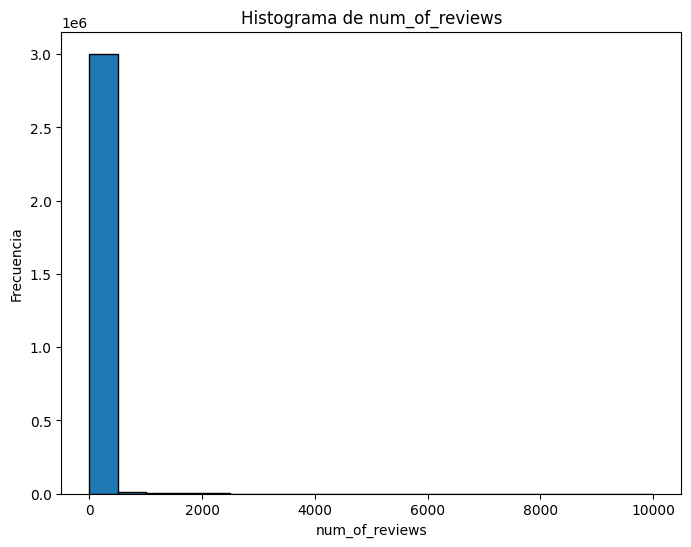

In [8]:
# Histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['num_of_reviews'], bins=20, edgecolor='black')
plt.title('Histograma de num_of_reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')
plt.show()


In [19]:
#Explorar solo categorias de vino
# Paso 1: Filtra las filas donde la lista de categorías contiene la palabra "wine"
wine_categories_df = df[df['category'].apply(lambda x: isinstance(x, list) and any("wine" in cat.lower() for cat in x))]

# Paso 2: Obtiene las categorías únicas resultantes
unique_wine_categories = set(cat for cats in wine_categories_df['category'] if isinstance(cats, list) for cat in cats if "wine" in cat.lower())

print(unique_wine_categories)


{'Winery', 'Wine store', 'Wine storage facility', 'Wine wholesaler and importer', 'Winemaking supply store', 'Wine bar', 'Wine', 'Wine cellar', 'Wine club'}


In [5]:
# Explorar ratings de categorias de vino 
# Paso 1: Filtra las filas donde la lista de categorías contiene la palabra "wine"
wine_categories_df = df[df['category'].apply(lambda x: isinstance(x, list) and any("wine" in cat.lower() for cat in x))]

# Paso 2: Obtiene las categorías únicas resultantes
unique_wine_categories = set(cat for cats in wine_categories_df['category'] if isinstance(cats, list) for cat in cats if "wine" in cat.lower())

# Paso 3: Calcula los avg ratings de las categorías que contienen "wine"
avg_ratings = {}
for category in unique_wine_categories:
    avg_ratings[category] = wine_categories_df[wine_categories_df['category'].apply(lambda x: isinstance(x, list) and category in x)]['avg_rating'].mean()

print(avg_ratings)


{'Winery': 4.664824537164963, 'Wine store': 4.334065639651707, 'Wine storage facility': 4.54505928853755, 'Wine wholesaler and importer': 4.375742574257425, 'Winemaking supply store': 4.605050505050505, 'Wine bar': 4.527799227799228, 'Wine': 4.55, 'Wine cellar': 4.668023255813953, 'Wine club': 4.702597402597402}


#### Todas las categorias seleccionadas estan por encima del 4 de avg rating, es una muy buena puntuacion 

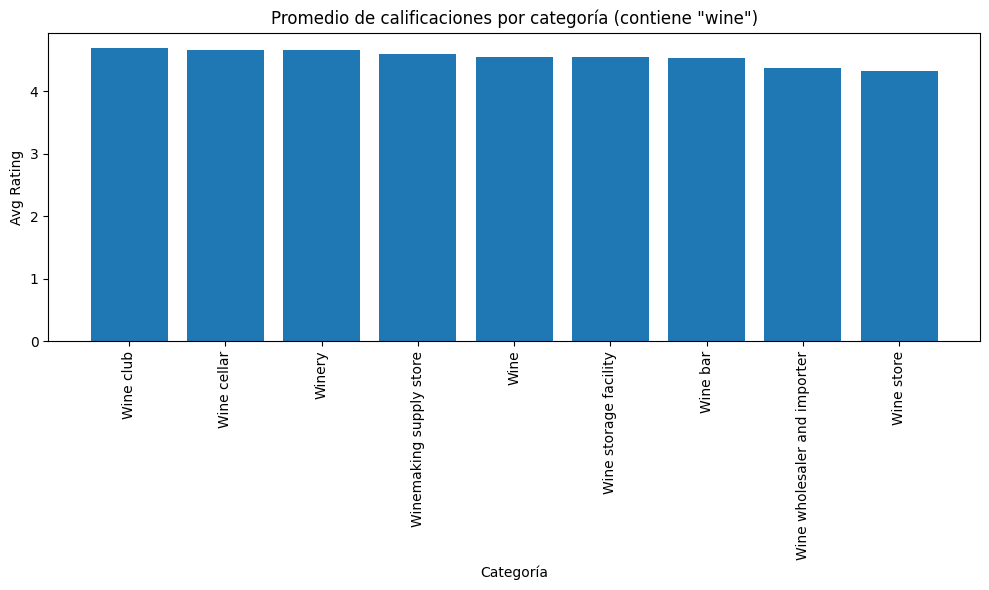

In [6]:
#Promedio de calificaciones por categoria wine

# Convierte el diccionario 'avg_ratings' en un DataFrame para facilitar la visualización
df_avg_ratings = pd.DataFrame(list(avg_ratings.items()), columns=['Category', 'Avg_Rating'])

# Ordena el DataFrame por el promedio de calificaciones en orden descendente
df_avg_ratings = df_avg_ratings.sort_values(by='Avg_Rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_avg_ratings['Category'], df_avg_ratings['Avg_Rating'])
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Avg Rating')
plt.title('Promedio de calificaciones por categoría (contiene "wine")')
plt.tight_layout()
plt.show()


#### En primera instancia los tres mejores calificados son Wine club, wine cellar y Winery

In [7]:
#Para imprimir las filas que contienen wine junto a otras categorias 

# Paso 1: Filtra las filas donde la lista de categorías contiene la palabra "wine" y otras categorías
wine_with_other_categories_rows = df[df['category'].apply(lambda x: isinstance(x, list) and "wine" in " ".join(cat.lower() for cat in x) and any("wine" not in cat.lower() for cat in x))]

print(wine_with_other_categories_rows)


                              name  \
693                       A-1 Mart   
865                    Bar Cicotti   
1317          Sav-On Liquor & Wine   
1477                   Village 631   
2320            Twin Cedars Winery   
...                            ...   
3023477               Twin Liquors   
3023963  Thousand Acre Cider House   
3023979           Mapleview Liquor   
3024068                   Shelly's   
3024701              Family Dollar   

                                                   address  \
693           A-1 Mart, 649 Himes Ave, Frederick, MD 21703   
865       Bar Cicotti, 202 Grand Ave, Bellingham, WA 98225   
1317     Sav-On Liquor & Wine, 720 S Lincoln Ave, O'Fal...   
1477       Village 631, 631 Ninth Ave, San Diego, CA 92101   
2320     Twin Cedars Winery, 26504 SE 146th St, Issaqua...   
...                                                    ...   
3023477  Twin Liquors, 4001 S Lamar Blvd a, Austin, TX ...   
3023963  Thousand Acre Cider House, 109 Grand A

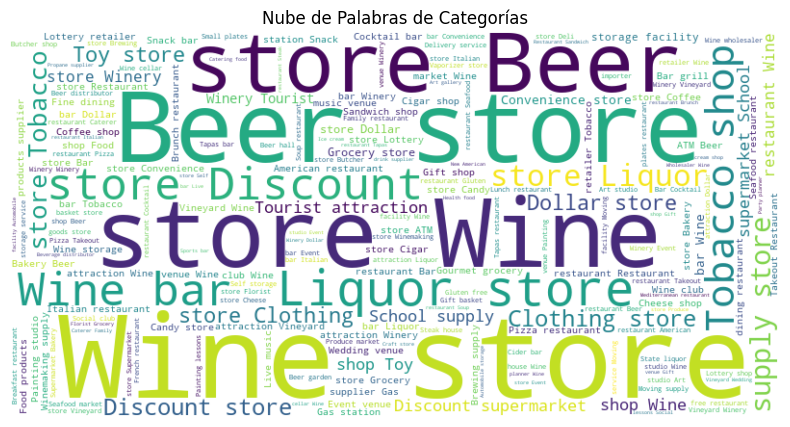

In [8]:
# Nube de Palabras de Categorías

# Crea un solo string con todas las categorías
all_categories = " ".join(cat for cats in wine_with_other_categories_rows['category'] for cat in cats)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Categorías')
plt.show()


In [20]:
# Para crear un df con categorias que solo tengan wine

# Paso 1: Filtra las filas donde la lista de categorías contiene la palabra "wine"
wine_categories_df = df[df['category'].apply(lambda x: isinstance(x, list) and any("wine" in cat.lower() for cat in x))]

# Paso 2: Obtiene las categorías únicas resultantes
unique_wine_categories = set(cat for cats in wine_categories_df['category'] if isinstance(cats, list) for cat in cats if "wine" in cat.lower())

# Paso 3: Filtrar el DataFrame original para las categorías únicas
subset_df = df[df['category'].apply(lambda x: isinstance(x, list) and any(cat in unique_wine_categories for cat in x))]

# Paso 4: Guardar el nuevo DataFrame en un archivo CSV
subset_df.to_csv('subset_wine_data.csv', index=False)


In [21]:
df1= pd.read_csv ('subset_wine_data.csv')
df1.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,relative_results
0,Damsel Cellars,"Damsel Cellars, 18746 142nd Ave NE, Woodinvill...",0x54900e9eb6075cf5:0xd8d04674d720ec5d,NaN,47.763553,-122.149258,['Winery'],4.6,16,"['0x54900e9c2583f56d:0xf3eead4d49a6ff9a', '0x5..."
1,Ghezzi's Package Store,"Ghezzi's Package Store, 970 Newfield St, Middl...",0x89e64b04d274c9d9:0x84d833dcc10ae21d,NaN,41.585605,-72.673818,['Wine store'],4.9,8,"['0x89e64afc84fafab7:0xdd375b67ed7e24ac', '0x8..."
2,fernandocellars,"fernandocellars, Miami, FL 33131",0x88d9b69d1cee40dd:0x1a4bd3fd9038cf8d,NaN,25.770635,-80.190063,['Wine store'],5.0,2,"['0x88d9b6825292a7a9:0xa47c64f7997fe6', '0x88d..."
3,A-1 Mart,"A-1 Mart, 649 Himes Ave, Frederick, MD 21703",0x89c9dbba3ac2a409:0xc5f2782a734c5cf6,NaN,39.407334,-77.447751,"['Convenience store', 'Beer store', 'Gas stati...",3.5,24,"['0x89c9dbb295e833df:0xb0717dcfbfa48b67', '0x8..."
4,Bar Cicotti,"Bar Cicotti, 202 Grand Ave, Bellingham, WA 98225",0x5485a3347991033d:0x5415b7890f774c35,NaN,48.753264,-122.479118,"['Restaurant', 'Coffee shop', 'Italian restaur...",4.2,8,NaN


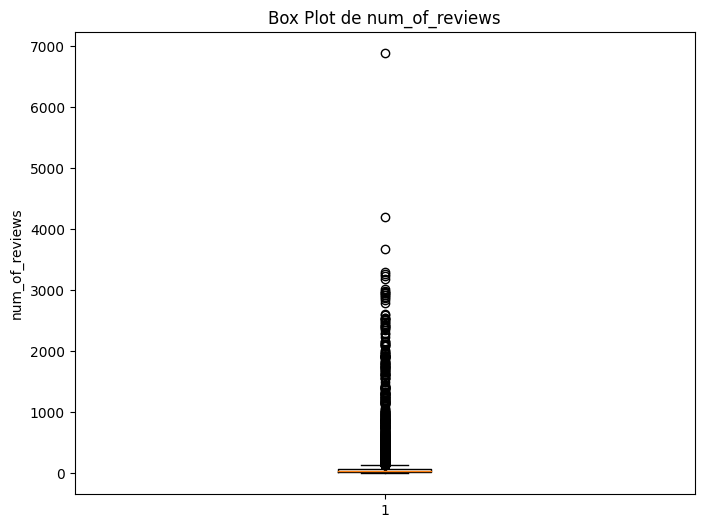

Outliers:
                                                    name  \
196                                               Movher   
322                    National Storage Centers - Alpine   
626    Empire Liquor- Spirits, Craft Beers, Kegs, Cigars   
744                                      Home Brew Party   
752                      Olive Garden Italian Restaurant   
...                                                  ...   
13669                               Gourmet World Market   
13670                                  Stompers Beverage   
13717                                    Kuhlman Cellars   
13746                                       Grain & Vine   
13781                                    Fleischer Sport   

                                                 address  \
196    Movher, 6010 E Broadway Ave, Spokane Valley, W...   
322    National Storage Centers - Alpine, 4000 Alpine...   
626    Empire Liquor- Spirits, Craft Beers, Kegs, Cig...   
744    Home Brew Party, 1031 

In [22]:
#Box plot para analizar outliers

# columna en la que deseas buscar outliers
column_name = 'num_of_reviews'

plt.figure(figsize=(8, 6))
plt.boxplot(subset_df[column_name])
plt.title(f'Box Plot de {column_name}')
plt.ylabel(column_name)
plt.show()

# Calcula el rango intercuartílico (IQR)
Q1 = subset_df[column_name].quantile(0.25)
Q3 = subset_df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define  los límites para los posibles outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los valores que están fuera de los límites como outliers
outliers = subset_df[(subset_df[column_name] < lower_bound) | (subset_df[column_name] > upper_bound)]

# Imprimir los outliers
print("Outliers:")
print(outliers)


#### De 10561 solo 918 son outliers, como representan menos del 1% se toman todos los outliers para el analisis por no resultar significativo para el volumen de datos

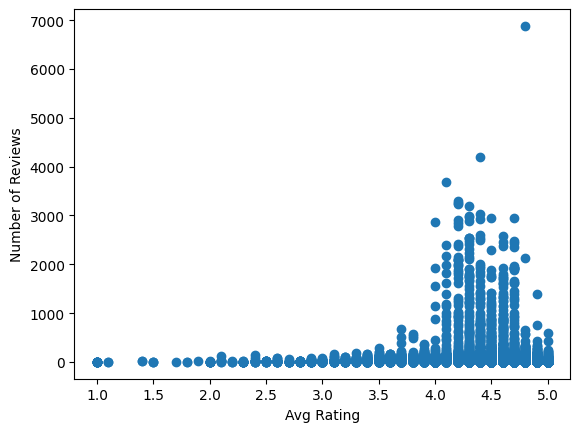

                avg_rating  num_of_reviews
avg_rating        1.000000       -0.008386
num_of_reviews   -0.008386        1.000000


In [34]:
#Para ver la relación entre las calificaciones (avg_rating) y el número de reseñas (num_of_reviews) 

df = pd.read_csv('subset_wine_data.csv')


plt.scatter(df['avg_rating'], df['num_of_reviews'])
plt.xlabel('Avg Rating')
plt.ylabel('Number of Reviews')
plt.show()
corr = df[['avg_rating', 'num_of_reviews']].corr()
print(corr)

#### Se puede ver una concentracion de mayor cantidad de reseñas que tienen puntuaciones entre 4 y 5 lo que implica que en la categoria wine las puntuaciones se ubican en sentimientos positivos.